<a href="https://colab.research.google.com/github/Katinon/Self-Study/blob/main/%ED%98%BC%EC%9E%90-%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D/21_LSTM%2CGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LSTM 신경망 훈련하기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=[val_seq, val_target], callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 39ms/step - loss: 0.6925 - accuracy: 0.5462 - val_loss: 0.6916 - val_accuracy: 0.5858
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6901 - accuracy: 0.6069 - val_loss: 0.6883 - val_accuracy: 0.6290
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6844 - accuracy: 0.6449 - val_loss: 0.6797 - val_accuracy: 0.6532
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6676 - accuracy: 0.6769 - val_loss: 0.6511 - val_accuracy: 0.6838
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6053 - accuracy: 0.7211 - val_loss: 0.5690 - val_accuracy: 0.7328
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5508 - accuracy: 0.7412 - val_loss: 0.5403 - val_accuracy: 0.7478
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5254 - accuracy: 0.7562 - val_loss: 0.5176 - val_ac

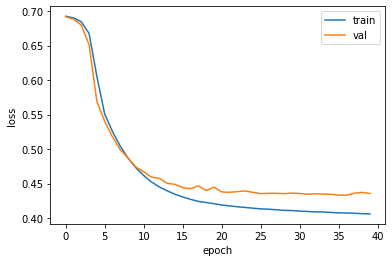

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 순환층에 드롭아웃 적용
# drop 매개변수 : 셀의 입력에 드롭아웃 적용
# recurrent_dropout : 순환되는 은닉 상태에 드롭아웃 적용
# 그러나 gpu 사용해서 모델 훈련 불가능

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-drop-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=[val_seq, val_target], callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 41ms/step - loss: 0.6924 - accuracy: 0.5314 - val_loss: 0.6912 - val_accuracy: 0.5838
Epoch 2/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6904 - accuracy: 0.5845 - val_loss: 0.6887 - val_accuracy: 0.6164
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6865 - accuracy: 0.6212 - val_loss: 0.6831 - val_accuracy: 0.6462
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6753 - accuracy: 0.6463 - val_loss: 0.6608 - val_accuracy: 0.6586
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6247 - accuracy: 0.6877 - val_loss: 0.6028 - val_accuracy: 0.7144
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5883 - accuracy: 0.7212 - val_loss: 0.5768 - val_accuracy: 0.7212
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5649 - accuracy: 0.7329 - val_loss: 0.5521 - val_ac

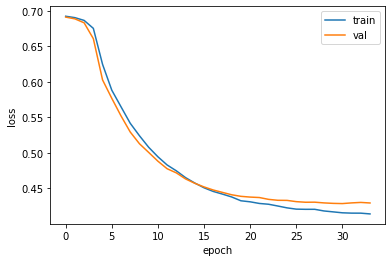

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 2개의 층 연결하기
# 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
# 순환 층을 쌓게 되면 모든 층에 순차 데이터 필요
# 출력층을 제외한 모든 순환층에 return_sequences=True

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=[val_seq, val_target], callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 79ms/step - loss: 0.6926 - accuracy: 0.5325 - val_loss: 0.6921 - val_accuracy: 0.5888
Epoch 2/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6902 - accuracy: 0.6008 - val_loss: 0.6878 - val_accuracy: 0.6592
Epoch 3/100
313/313 [==============================] - 24s 75ms/step - loss: 0.6777 - accuracy: 0.6657 - val_loss: 0.6568 - val_accuracy: 0.7010
Epoch 4/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6032 - accuracy: 0.7082 - val_loss: 0.5725 - val_accuracy: 0.7170
Epoch 5/100
313/313 [==============================] - 23s 75ms/step - loss: 0.5584 - accuracy: 0.7312 - val_loss: 0.5445 - val_accuracy: 0.7394
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5360 - accuracy: 0.7467 - val_loss: 0.5226 - val_accuracy: 0.7556
Epoch 7/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5182 - accuracy: 0.7568 - val_loss: 0.5095 - val_ac

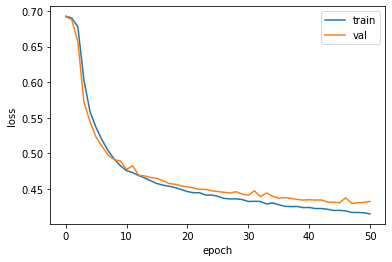

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# GRU 구조, LSTM을 간소화한 버전
# 셀 상태를 계산하지 않고 은닉 상태만 포함
# 가중치가 LSTM보다 적지만 그에 못지않은 좋은 성능 가짐

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=[val_seq, val_target], callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6925 - accuracy: 0.5350 - val_loss: 0.6919 - val_accuracy: 0.5752
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6905 - accuracy: 0.5797 - val_loss: 0.6895 - val_accuracy: 0.5902
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6871 - accuracy: 0.6033 - val_loss: 0.6853 - val_accuracy: 0.6018
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6810 - accuracy: 0.6193 - val_loss: 0.6782 - val_accuracy: 0.6190
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6706 - accuracy: 0.6327 - val_loss: 0.6662 - val_accuracy: 0.6282
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6535 - accuracy: 0.6482 - val_loss: 0.6465 - val_accuracy: 0.6488
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6243 - accuracy: 0.6725 - val_loss: 0.6112 - val_ac

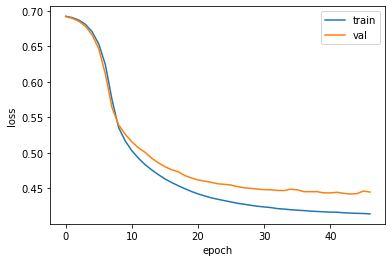

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 2개의 순환층을 쌓은 모델을 다시 로드하여 테스트 세트 성능 확인
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 10s 12ms/step - loss: 0.4275 - accuracy: 0.7990


[0.42749398946762085, 0.7990400195121765]

In [ ]:
!ls -la *.h5

-rw-r--r-- 1 root root 122176 Feb 15 14:28 best-2rnn-model.h5
-rw-r--r-- 1 root root 103864 Feb 15 14:09 best-drop-model.h5
-rw-r--r-- 1 root root 101816 Feb 15 14:38 best-gru-model.h5
-rw-r--r-- 1 root root 103864 Feb 15 14:02 best-lstm-model.h5
